In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# twiss parameters
alpha = -0.8
beta = 1
gamma = (1+alpha**2)/beta
eta = 1

In [3]:
# phase space ellipsis (Hinterberger 2018, p.254)
def x_dx(phi):
    e = (eta)**0.5*np.cos(phi)
    de = (eta)**0.5*np.sin(phi)
    x = beta**0.5 * e
    dx = -alpha*beta**-0.5 * e + beta**-0.5 * de
    return x, dx


q = 0.6


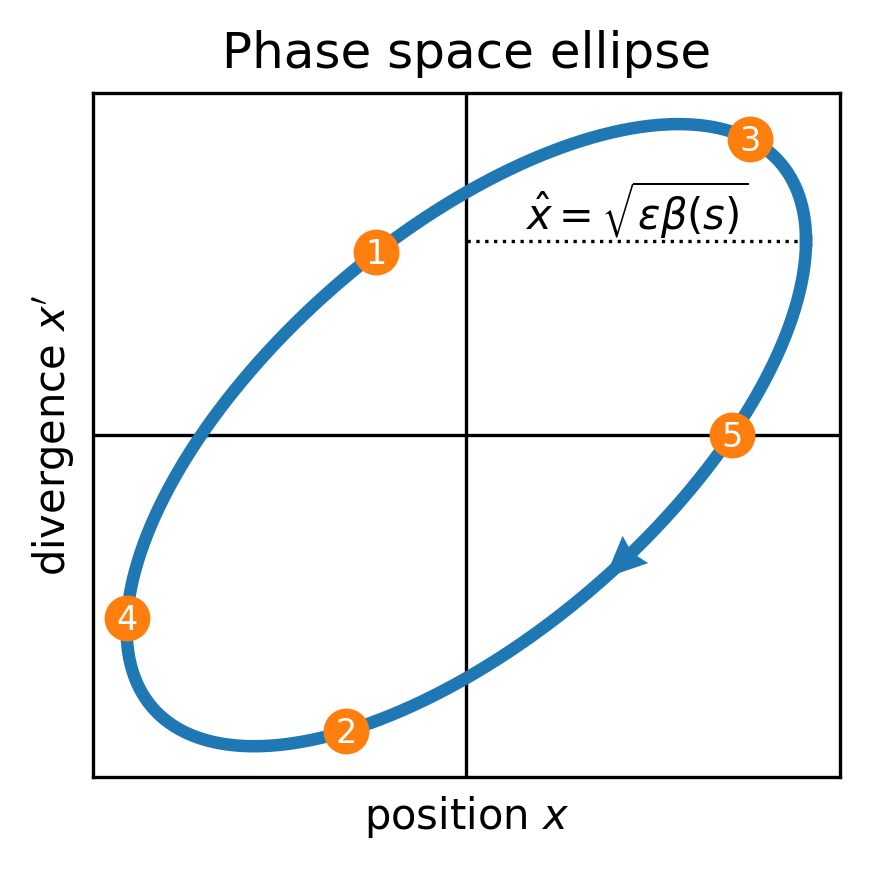

In [5]:
fig, ax = plt.subplots(1,1,figsize=(3,3),dpi=300)

phi = np.linspace(0, 2*np.pi, 1000)
X, Y = x_dx(phi)
ax.plot(X, Y, linewidth=3)

i = np.argmin(np.abs(phi-3.3*np.pi/2))
ax.quiver(X[i], Y[i], -np.diff(X)[i], -np.diff(Y)[i], angles='xy', color='tab:blue', zorder=5, pivot="mid",
          headlength=2*5, headwidth=3*3, headaxislength=2*4.5)

w = ax.spines['left'].get_linewidth()
ax.axhline(c='k', linewidth=w, zorder=-1)
ax.axvline(c='k', linewidth=w, zorder=-1)

#px = - -alpha*(eta/gamma)**0.5
#py = - (eta*gamma)**0.5
##ax.plot(px, py, '.', c='tab:blue')
#ax.plot([px,px], [0,py], c='k', linewidth=w, zorder=-1, linestyle=':')
#ax.text(px, py/2, '$\\hat{x}\'=\\sqrt{\\epsilon \\gamma(s)}$', ha='right', va='center', rotation=90)

px = (eta*beta)**0.5
py = -alpha*(eta/beta)**0.5
#ax.plot(px, py, '.', c='tab:blue')
ax.plot([px,0], [py,py], c='k', linewidth=w, zorder=-1, linestyle=':')
ax.text(px/2, py, '$\\hat{x}=\\sqrt{\\epsilon \\beta(s)}$', ha='center', va='bottom')

N = 5
q = 3/N # 0.6
phi0 = np.arctan(alpha)
print('q =', q)

XY = x_dx(-np.arange(0, N, 1)*q*2*np.pi+phi0)
ax.plot(*XY, 'o', markersize=10)
for i, (x, y) in enumerate(zip(*XY)):
    plt.text(x , y-0.01, i or N, ha='center', va='center', fontsize=8, c='w')

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Phase space ellipse')
ax.set_xlabel('position $x$')
ax.set_ylabel('divergence $x\'$')

fig.tight_layout()
fig.savefig('phase_space_ellipse.pdf')